

## Exploratory data analysis

In [1]:
import warnings
from itertools import combinations
from pprint import pprint
import os

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

from scipy import stats
from scipy.special import inv_boxcox, boxcox1p

color = sns.color_palette()

# supress unnecessary warnings for readability and cleaner presentation
warnings.filterwarnings('ignore')

%matplotlib inline

### Data reading

In this section we will read both train and score data.

In [2]:
%ls  # files in folder

CaseStudy2.pdf          images/         score_data.csv
confusion_matrix.ipynb  MODELING.ipynb  score_data_predicted.csv
EDA.ipynb               PMI.pptx        use_case_data.csv


In [3]:
os.makedirs('images', exist_ok=True)

In [4]:
# reading data
df_train = pd.read_csv('use_case_data.csv')
df_score = pd.read_csv('score_data.csv')

In [5]:
df_train.head()

,REGION,MARKET,BRM,BLDIMAGE,BRANDDIFFERENTIATOR,BRANDFAMILY,BRANDONMARKET,BRANDSUBFAMILY,BRANDSUBFAMILYGROUP,BRANDSUBFAMILYGROUPING,...,PCKT,PRICECLASSON,TCLASS,RETAILPACKPRICE,SPECIALFLAVOR,TRCONTE,THICATEGORY,TIPCOLOR,TRACKINGSTATUS,Market_Share
0,REGION1,MARKET7,BRM36,BLDIMAGE9,BRANDDIFFERENTIATOR98,BRANDFAMILY12,BRANDONMARKET36,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,15.00,SPECIALFLAVOR7,10.0,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,0.001440
1,REGION1,MARKET7,BRM37,BLDIMAGE9,BRANDDIFFERENTIATOR98,BRANDFAMILY12,BRANDONMARKET37,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,19.55,SPECIALFLAVOR7,10.0,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,0.002881
2,REGION1,MARKET7,BRM38,BLDIMAGE9,BRANDDIFFERENTIATOR98,BRANDFAMILY12,BRANDONMARKET38,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,27.00,SPECIALFLAVOR7,10.0,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,0.028870
3,REGION1,MARKET7,BRM58,BLDIMAGE9,BRANDDIFFERENTIATOR267,BRANDFAMILY12,BRANDONMARKET58,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,29.25,SPECIALFLAVOR7,8.0,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,0.018922
4,REGION1,MARKET7,BRM73,BLDIMAGE9,BRANDDIFFERENTIATOR467,BRANDFAMILY12,BRANDONMARKET73,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,15.00,SPECIALFLAVOR7,11.0,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,0.000928


In [6]:
df_score.head()

,REGION,MARKET,BRM,BLDIMAGE,BRANDDIFFERENTIATOR,BRANDFAMILY,BRANDONMARKET,BRANDSUBFAMILY,BRANDSUBFAMILYGROUP,BRANDSUBFAMILYGROUPING,...,NPLLAUNCHYEAR,PCKT,PRICECLASSON,TCLASS,RETAILPACKPRICE,SPECIALFLAVOR,TRCONTE,THICATEGORY,TIPCOLOR,TRACKINGSTATUS
0,REGION1,MARKET7,BRM36,BLDIMAGE9,BRANDDIFFERENTIATOR98,BRANDFAMILY12,BRANDONMARKET36,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,NPLLAUNCHYEAR4,PCKT11,PRICECLASSON2,TCLASS2,15.00,SPECIALFLAVOR7,10,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2
1,REGION1,MARKET7,BRM37,BLDIMAGE9,BRANDDIFFERENTIATOR98,BRANDFAMILY12,BRANDONMARKET37,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,NPLLAUNCHYEAR4,PCKT11,PRICECLASSON2,TCLASS2,19.55,SPECIALFLAVOR7,10,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2
2,REGION1,MARKET7,BRM38,BLDIMAGE9,BRANDDIFFERENTIATOR98,BRANDFAMILY12,BRANDONMARKET38,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,NPLLAUNCHYEAR7,PCKT11,PRICECLASSON2,TCLASS2,27.00,SPECIALFLAVOR7,10,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2
3,REGION1,MARKET7,BRM58,BLDIMAGE9,BRANDDIFFERENTIATOR267,BRANDFAMILY12,BRANDONMARKET58,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,NPLLAUNCHYEAR7,PCKT11,PRICECLASSON2,TCLASS2,29.25,SPECIALFLAVOR7,8,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2
4,REGION1,MARKET7,BRM73,BLDIMAGE9,BRANDDIFFERENTIATOR467,BRANDFAMILY12,BRANDONMARKET73,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,NPLLAUNCHYEAR4,PCKT11,PRICECLASSON2,TCLASS2,15.00,SPECIALFLAVOR7,11,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2


In [7]:
# comparing columns
print('Columns {} are in "df_train" and not in "df_score".'.format(set(df_train.columns) - set(df_score.columns)))
print('Columns {} are in "df_score" and not in "df_train".'.format(set(df_score.columns) - set(df_train.columns)))

Columns {'Market_Share'} are in "df_train" and not in "df_score".
Columns set() are in "df_score" and not in "df_train".


So as we excpected train and score data contain the same columns excpet response variable - Market_Share.

### Data Cleaning & Pre-processing

In this section we will explore features types (Numeric and Categoric) and clean some not useful or duplicate columns.

In [8]:
# checking types of our data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716 entries, 0 to 1715
Data columns (total 40 columns):
REGION                    1716 non-null object
MARKET                    1716 non-null object
BRM                       1716 non-null object
BLDIMAGE                  1716 non-null object
BRANDDIFFERENTIATOR       1716 non-null object
BRANDFAMILY               1716 non-null object
BRANDONMARKET             1716 non-null object
BRANDSUBFAMILY            1716 non-null object
BRANDSUBFAMILYGROUP       1716 non-null object
BRANDSUBFAMILYGROUPING    1716 non-null object
BRANDSUBFAMILYLINE        1716 non-null object
CHARINDICATOR             1716 non-null object
BRMID                     1716 non-null int64
INDICATOR                 1716 non-null object
RTYPE                     473 non-null object
INTERNATIONALINDICATOR    1716 non-null object
ISREPLACEMENT             1716 non-null object
ISSTRATEGIC               1716 non-null object
ITEMSHAPE                 804 non-null object
ITE

In [9]:
list(set(df_train.dtypes.tolist()))

[dtype('O'), dtype('float64'), dtype('int64')]

We have 40 columns: 39 are our predictors (features) and 1 (Market_Share) is our response (target) variable.

From types of features we see that we have both Numerical and Categorical features.

So we will combine train and score data for properly handling Categorical features (for example one-hot-encoding).

In [10]:
df_train['data_type'] = 'train'
df_score['data_type'] = 'score'

df = pd.concat([df_train.drop(columns=['Market_Share']), df_score])
df.reset_index(inplace=True, drop=True)

In [11]:
not_useful_features = []

#### Numerical features

In [12]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,BRMID,ITEMSCODE,LATESTPERIODINDEX,LEN,NCON,NPLLAUNCHDATE,RETAILPACKPRICE,TRCONTE
0,60038893,20,12,84.0,0.0,201110,15.00,10.0
1,60040489,26,12,84.0,0.0,201110,19.55,10.0
2,60078730,40,12,84.0,0.0,201409,27.00,10.0
3,60078732,40,12,84.0,0.0,201409,29.25,8.0
4,60038898,20,12,84.0,0.0,201110,15.00,11.0


In [13]:
df_num.describe()

,BRMID,ITEMSCODE,LATESTPERIODINDEX,LEN,NCON,NPLLAUNCHDATE,RETAILPACKPRICE,TRCONTE
count,1.745000e+03,1745.000000,1745.0,1745.000000,1745.000000,1745.000000,1745.000000,1745.000000
mean,5.633265e+07,19.618911,12.0,33.961404,0.334441,201196.867049,314.262625,5.406281
std,4.840959e+06,3.213858,0.0,43.020778,0.452951,226.543530,1416.905866,3.686591
min,5.000239e+07,5.000000,12.0,0.000000,0.000000,200801.000000,0.000000,0.000000
25%,5.007097e+07,20.000000,12.0,0.000000,0.000000,201006.000000,4.000000,3.000000
50%,6.005254e+07,20.000000,12.0,0.000000,0.300000,201206.000000,11.500000,6.000000
75%,6.007422e+07,20.000000,12.0,84.000000,0.600000,201404.000000,57.000000,8.000000
max,6.012768e+07,40.000000,12.0,100.000000,10.000000,201603.000000,22000.000000,35.000000


In [14]:
n = len(df_train)
for column in df_num:
    n_unique = len(df_train[column].unique())
    print('feature: {}'.format(column))
    print('unique values: {}'.format(n_unique))
    print('unique values ratio: {}'.format(n_unique / n))
    print('missinge value ratio: {}'.format(df_train[column].isnull().sum() / n))
    print()


feature: BRMID
unique values: 1716
unique values ratio: 1.0
missinge value ratio: 0.0

feature: ITEMSCODE
unique values: 22
unique values ratio: 0.01282051282051282
missinge value ratio: 0.0

feature: LATESTPERIODINDEX
unique values: 1
unique values ratio: 0.0005827505827505828
missinge value ratio: 0.0

feature: LEN
unique values: 28
unique values ratio: 0.016317016317016316
missinge value ratio: 0.0

feature: NCON
unique values: 21
unique values ratio: 0.012237762237762238
missinge value ratio: 0.0

feature: NPLLAUNCHDATE
unique values: 99
unique values ratio: 0.057692307692307696
missinge value ratio: 0.0

feature: RETAILPACKPRICE
unique values: 351
unique values ratio: 0.20454545454545456
missinge value ratio: 0.0

feature: TRCONTE
unique values: 32
unique values ratio: 0.018648018648018648
missinge value ratio: 0.0



**Initial Distribution of features:**

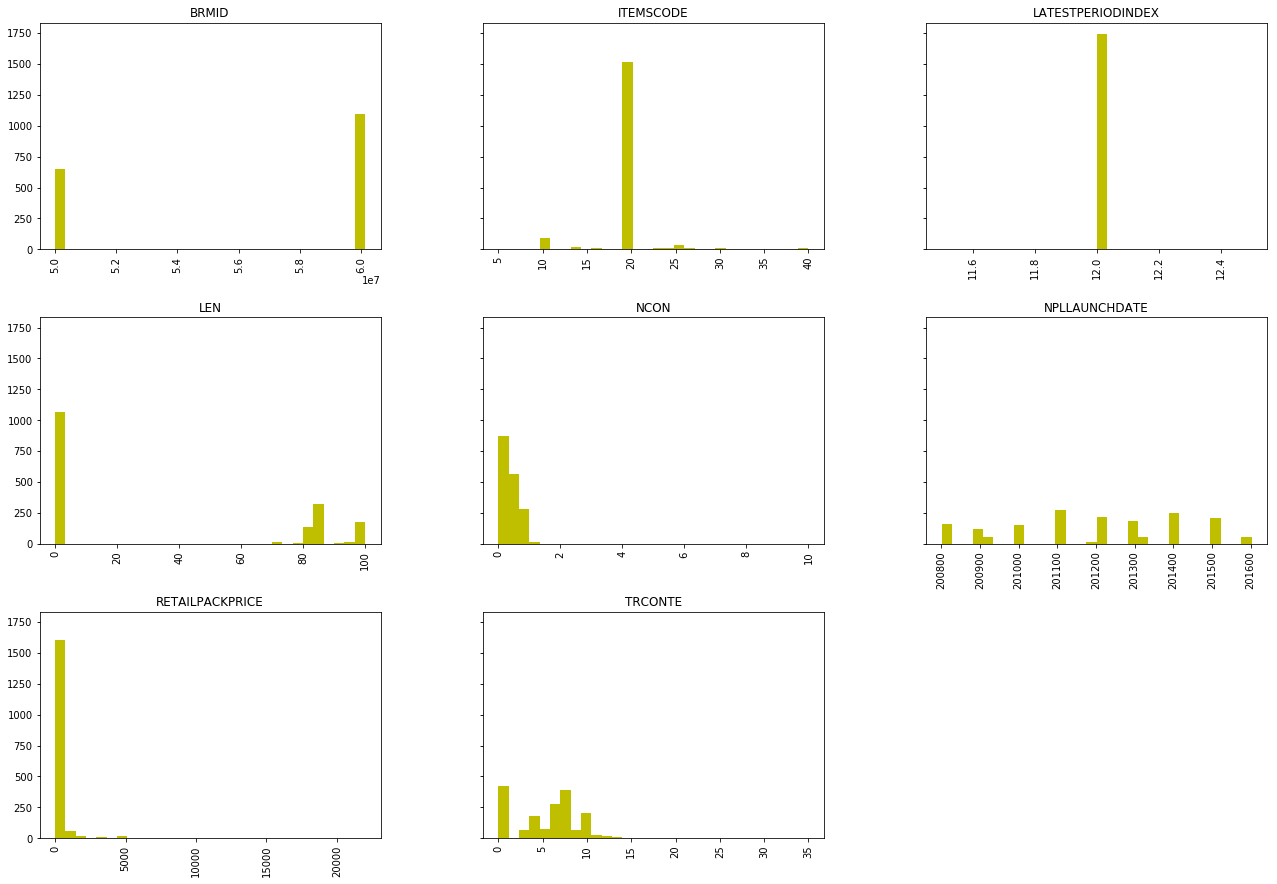

In [15]:
df_num.hist(figsize=(22, 15), facecolor='y', grid=False, xrot=90, sharey=True, bins=30);

**Step-by-step features processing:**

* **BRMID :**  We can see this represents some ID, which is unique for each item. We will not use it.


* **LATESTPERIODINDEX :** As we can see this feature is the same for all items and just informing us that Market_Share numbers are  12 months after launch. We will not use it.


* **ITEMSCODE :** Change to dtype *category*.


* **NPLLAUNCHDATE :** This fetaure represents the year and month of product launch. So this is feature is more categoric than numeric.We will split it into year and month separately and change to dtype *category*.


* The other numerical features: **LEN, NCON, RETAILPACKPRICE, TRCONTE** are numerical and we will keep them as they are at this stage.

In [16]:
# adding to not_useful_features list
not_useful_features.append('BRMID')

# adding to not_useful_features list
not_useful_features.append('LATESTPERIODINDEX')

# changing dtype to category
df['ITEMSCODE'] = df['ITEMSCODE'].astype('category')

# spliting to year and month, adding to not_useful_features list
df['LAUNCH_YEAR'], df['LAUNCH_MONTH'] = df['NPLLAUNCHDATE'].map(str).apply(lambda x: [x[:4], x[4:]]).str
not_useful_features.append('NPLLAUNCHDATE')

#### Categorical features

In [17]:
df_cat = df.select_dtypes(include = ['O', 'category'])
df_cat.head()

,REGION,MARKET,BRM,BLDIMAGE,BRANDDIFFERENTIATOR,BRANDFAMILY,BRANDONMARKET,BRANDSUBFAMILY,BRANDSUBFAMILYGROUP,BRANDSUBFAMILYGROUPING,...,PCKT,PRICECLASSON,TCLASS,SPECIALFLAVOR,THICATEGORY,TIPCOLOR,TRACKINGSTATUS,data_type,LAUNCH_YEAR,LAUNCH_MONTH
0,REGION1,MARKET7,BRM36,BLDIMAGE9,BRANDDIFFERENTIATOR98,BRANDFAMILY12,BRANDONMARKET36,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,SPECIALFLAVOR7,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,train,2011,10
1,REGION1,MARKET7,BRM37,BLDIMAGE9,BRANDDIFFERENTIATOR98,BRANDFAMILY12,BRANDONMARKET37,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,SPECIALFLAVOR7,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,train,2011,10
2,REGION1,MARKET7,BRM38,BLDIMAGE9,BRANDDIFFERENTIATOR98,BRANDFAMILY12,BRANDONMARKET38,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,SPECIALFLAVOR7,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,train,2014,09
3,REGION1,MARKET7,BRM58,BLDIMAGE9,BRANDDIFFERENTIATOR267,BRANDFAMILY12,BRANDONMARKET58,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,SPECIALFLAVOR7,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,train,2014,09
4,REGION1,MARKET7,BRM73,BLDIMAGE9,BRANDDIFFERENTIATOR467,BRANDFAMILY12,BRANDONMARKET73,BRANDSUBFAMILY12,BRANDSUBFAMILYGROUP12,BRANDSUBFAMILYGROUPING12,...,PCKT11,PRICECLASSON2,TCLASS2,SPECIALFLAVOR7,THICATEGORY4,TIPCOLOR1,TRACKINGSTATUS2,train,2011,10


* Lets check all categorical features.

In [18]:
feature_unique_values = {}
n = len(df_cat)
for column in df_cat:
    if column == 'data_type':
        continue   
    
    n_unique = len(df_cat[column].unique())
    feature_unique_values[column] = n_unique
    print('feature: {}'.format(column))
    print('unique values: {}'.format(n_unique))
    print('cardinality ratio: {}'.format(n_unique / n))
    print('missinge value ratio: {}'.format(df_cat[column].isnull().sum() / n))
    print()

feature: REGION
unique values: 4
cardinality ratio: 0.002292263610315186
missinge value ratio: 0.0

feature: MARKET
unique values: 115
cardinality ratio: 0.0659025787965616
missinge value ratio: 0.0

feature: BRM
unique values: 1099
cardinality ratio: 0.6297994269340974
missinge value ratio: 0.0

feature: BLDIMAGE
unique values: 8
cardinality ratio: 0.004584527220630372
missinge value ratio: 0.0

feature: BRANDDIFFERENTIATOR
unique values: 584
cardinality ratio: 0.3346704871060172
missinge value ratio: 0.0

feature: BRANDFAMILY
unique values: 71
cardinality ratio: 0.040687679083094556
missinge value ratio: 0.0

feature: BRANDONMARKET
unique values: 1099
cardinality ratio: 0.6297994269340974
missinge value ratio: 0.0

feature: BRANDSUBFAMILY
unique values: 125
cardinality ratio: 0.07163323782234957
missinge value ratio: 0.0

feature: BRANDSUBFAMILYGROUP
unique values: 75
cardinality ratio: 0.04297994269340974
missinge value ratio: 0.0

feature: BRANDSUBFAMILYGROUPING
unique values: 125


**Step-by-step features processing:**

* **ISREPLACEMENT :** This feature value is the same for all items, so we will not use it.



* We can see that there are some features, which have the same count of unique values. These features are possible duplicate features. We will check it with the following logic: 2 features will be considered as the same, if they have *unique* mapping, aka *to each value from f_1 corresponds only one value from f_2 and vice versa*. 

In [19]:
# adding to not_useful_features list
not_useful_features.append('ISREPLACEMENT')

In [20]:
# finding possible duplicates
possible_duplicates = {}
for x in list(set(feature_unique_values.values())):
    temp = [k for k, v in feature_unique_values.items() if v == x]
    if len(temp) > 1:
        possible_duplicates[x] = temp

pprint(possible_duplicates, width=100)

{2: ['CHARINDICATOR', 'ISSTRATEGIC', 'ITEMSHAPE', 'MINDICATOR', 'TRACKINGSTATUS'],
 3: ['INDICATOR', 'INTERNATIONALINDICATOR'],
 4: ['REGION', 'TCLASS'],
 5: ['RTYPE', 'LENCATEGORY', 'PRICECLASSON', 'THICATEGORY'],
 8: ['BLDIMAGE', 'SPECIALFLAVOR', 'TIPCOLOR'],
 9: ['NPLLAUNCHYEAR', 'LAUNCH_YEAR'],
 12: ['LOCALCLASS', 'LAUNCH_MONTH'],
 22: ['ITEMSCODE', 'PRICECLASS'],
 125: ['BRANDSUBFAMILY', 'BRANDSUBFAMILYGROUPING'],
 1099: ['BRM', 'BRANDONMARKET', 'MARKETEDBRAND']}


In [21]:
# helper function for investigating duplicate features
def is_the_same_feature(data: pd.DataFrame, f_1: str, f_2: str) -> bool:
    """
    Return True, if 2 features are the same in given DataFrame. 
    2 features will be considered as the same, if they have unique mapping,
    aka for each value from f_1 there is only one value from f_2 and vice versa.  
    """
    unique_pairs_df = data.groupby([f_1,  f_2]).size().reset_index().rename(columns={0:'count'})
    n_unique_pairs = unique_pairs_df.shape[0]
    
    f_1_unique_values = unique_pairs_df[f_1].unique().shape[0]
    f_2_unique_values = unique_pairs_df[f_2].unique().shape[0]
    return f_1_unique_values == f_2_unique_values == n_unique_pairs 

# checking all possible_duplicates
duplicate_features = []
for v in possible_duplicates.values():
    all_possible_pairs = list(combinations(v, 2))
    for (f_1, f_2) in all_possible_pairs:
        if is_the_same_feature(df_cat, f_1, f_2):
            print('features {} and {} are the same'.format(f_1, f_2))
            duplicate_features.append((f_1, f_2))

features NPLLAUNCHYEAR and LAUNCH_YEAR are the same
features BRM and BRANDONMARKET are the same
features BRM and MARKETEDBRAND are the same
features BRANDONMARKET and MARKETEDBRAND are the same
features BRANDSUBFAMILY and BRANDSUBFAMILYGROUPING are the same


* **NPLLAUNCHYEAR, LAUNCH_YEAR :** These features are the same, so we will keep only one of them.


* **BRM, BRANDONMARKET, MARKETEDBRAND :** These features are the same, so we will keep only one of them.


* **BRANDSUBFAMILY, BRANDSUBFAMILYGROUPING :** These features are the same, so we will keep only one of them.

In [22]:
# we will keep only one from the duplicate features
not_useful_features.extend(['BRM', 'MARKETEDBRAND', 'BRANDSUBFAMILY', 'NPLLAUNCHYEAR'])

In [23]:
del df_cat, df_num  # these dfs were created only for analysis, so now we can remove them

We finished with features cleaning from not useful ones. Now we will move to missing values.

#### Missing values

In [24]:
# features with missing values
columns_na = (df.isnull().sum() / df.shape[0]) * 100
columns_na = columns_na.drop(columns_na[columns_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio': columns_na})
missing_data.head(20)

,Missing Ratio
RTYPE,72.779370
SPECIALFLAVOR,60.687679
ITEMSHAPE,53.123209
TIPCOLOR,48.997135


Text(0.5, 1.0, 'Percent missing data by feature')

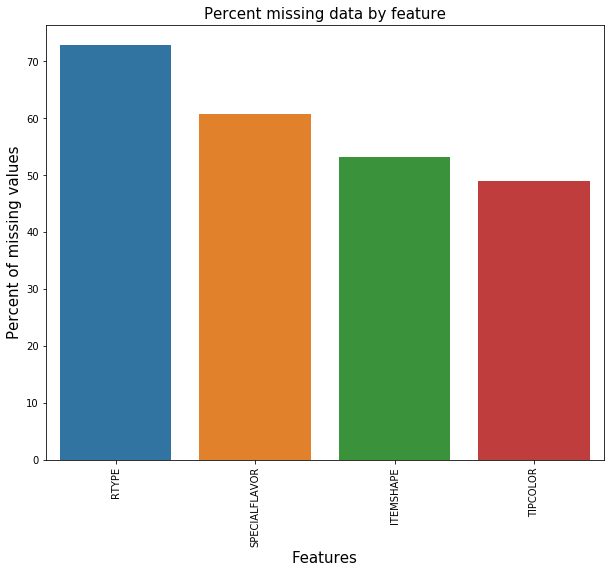

In [25]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=columns_na.index, y=columns_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

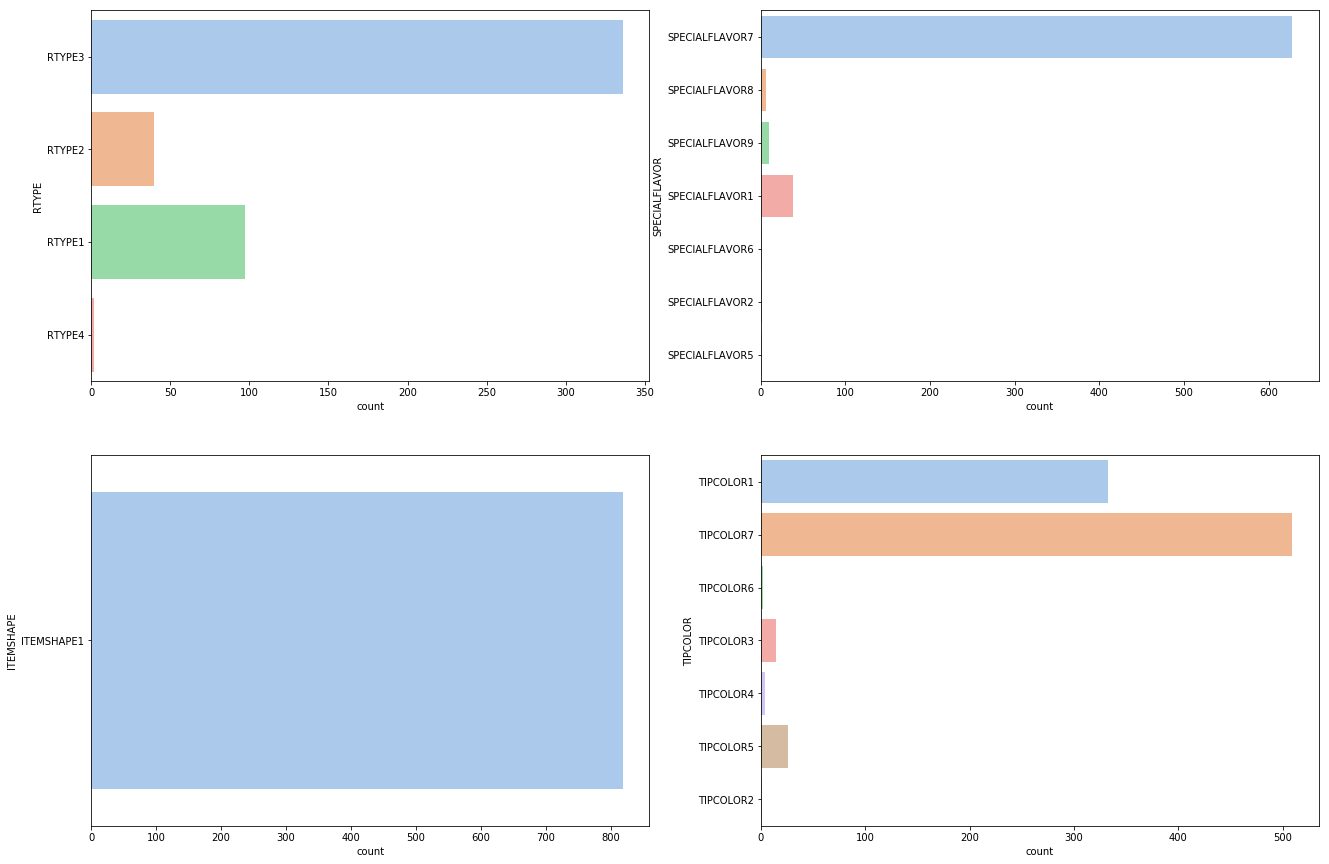

In [26]:
f, ax = plt.subplots(2,2, figsize = (22,15))
cols = columns_na.index
k = 0
for i in range(2):
    for j in range(2):
        sns.countplot(y=cols[k], palette="pastel", data=df[cols], ax=ax[i][j]);
        k += 1


**Inputing missing values**

We impute them by proceeding sequentially through features with missing values.

-   **RTYPE** : As we do not have any idea, what does it mean this feature and it's missing percentage is quite high, we will not use it.


-   **SPECIALFLAVOR** : We assume that missing value of this feature, means that product does not have special flavor, so it is one additional category.


-   **ITEMSHAPE** : Missing values of this feature is most probably means that data was not avialable, so we will not use it.



-   **TIPCOLOR** : We assume that missing value of this feature, means that product does not have tip color, so it is one additional category.

In [27]:
not_useful_features.extend(['RTYPE', 'ITEMSHAPE'])

df['SPECIALFLAVOR'].fillna('NOSPECIALFLAVOR', inplace=True)  # filling missing values
df['TIPCOLOR'].fillna('NOTIPCOLOR', inplace=True)  # filling missing values

In [28]:
# removing not useful features 
df.drop(columns=not_useful_features, inplace=True)
print('final number of features: {}'.format(len(df.columns) - 1))  # -1 i for "data_type" -> train or score

# checking that there is no any missing columns
assert not np.all(df.isnull())

final number of features: 31


 Now will move to visulations in order to get some insights about distributions, correlations, ...

### Exploring Numerical data

In [29]:
df_num = df[df['data_type'] == 'train'] 
df_num['Market_Share'] = df_train['Market_Share']
df_num = df_num.select_dtypes(include=['float64'])

In [30]:
df_num.describe()

,LEN,NCON,RETAILPACKPRICE,TRCONTE,Market_Share
count,1716.000000,1716.000000,1716.000000,1716.000000,1716.000000
mean,33.862850,0.336713,318.483643,5.394499,0.004652
std,42.990537,0.454247,1428.369562,3.673687,0.008118
min,0.000000,0.000000,0.000000,0.000000,-0.000419
25%,0.000000,0.000000,3.875000,3.000000,0.000862
50%,0.000000,0.400000,11.000000,6.000000,0.002299
75%,84.000000,0.600000,57.250000,8.000000,0.005167
max,100.000000,10.000000,22000.000000,35.000000,0.146897


We can see that we have some negative values, for MarketShare, so we will remove these inputs, beacuse it is imossible in eality.

In [31]:
# removing negative values
df_num = df_num[df_num['Market_Share'] >= 0]

Lets check our data agianst Succcess and Failure

In [32]:
threshold = 0.007
success_ratio = (df_num['Market_Share'] > threshold).sum() / len(df_num)
print('Success / Failure: {:.2f} / {:.2f}'.format(success_ratio, 1 - success_ratio))

df_num['S/F'] = df_num['Market_Share'] > threshold
df_num.loc[df_num['S/F'] == True, 'S/F'] = 'S'
df_num.loc[df_num['S/F'] == False, 'S/F'] = 'F'

Success / Failure: 0.19 / 0.81


So our dataset is imbalanced in terms of classfication, because our classes frequency in dataset is very different.

#### Correlations between numerical variables

In [33]:
correlation = df_num.corr()
print(correlation['Market_Share'].sort_values(ascending = False),'\n')

Market_Share       1.000000
RETAILPACKPRICE   -0.008236
TRCONTE           -0.050436
NCON              -0.061803
LEN               -0.108343
Name: Market_Share, dtype: float64 



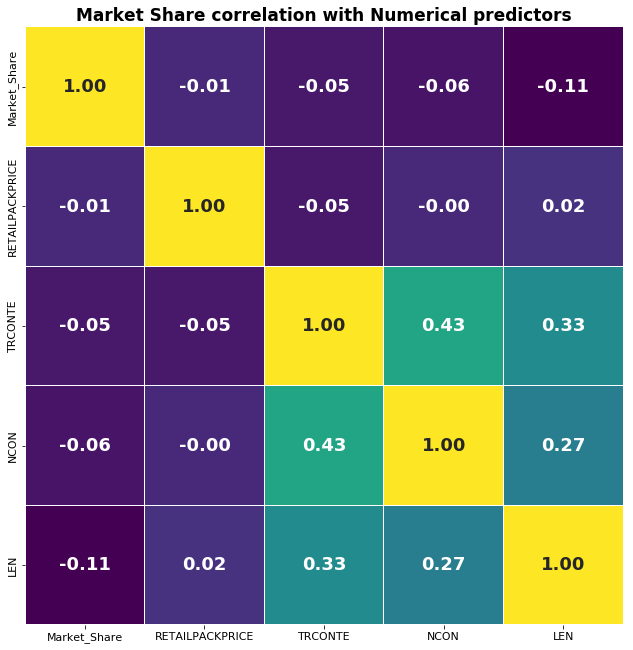

In [34]:
k = 5
cols = correlation.nlargest(k, 'Market_Share')['Market_Share'].index
cm = np.corrcoef(df_num[cols].values.T)
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(cm, vmax=.8, linewidths=0.01, square=True, annot=True, cmap='viridis', fmt='.2f', cbar=False,
            linecolor="white", xticklabels=cols.values, 
            annot_kws={'size': 18, 'fontweight': 'bold'}, 
            yticklabels=cols.values)
title = 'Market Share correlation with Numerical predictors'
for x in ax.get_xticklabels():
    x.set_size(11)

for x in ax.get_yticklabels():
    x.set_size(11)
    x.set_va('center')
    
plt.title(title, fontsize=17, fontweight='bold')
plt.savefig(os.path.join('images', title))
plt.show()

* We can see that there is **no linear correlation** between response variable and numerical predictors.

#### Pairplots of numerical variables

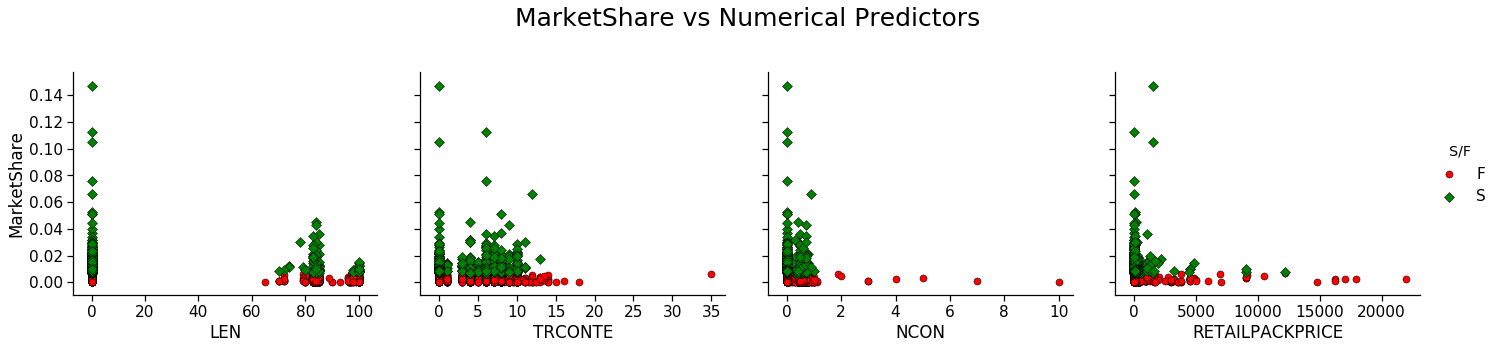

In [35]:
with sns.plotting_context("notebook", font_scale=1.4):
    pp = sns.pairplot(df_num, 
                      hue='S/F',
                      x_vars=['LEN', 'TRCONTE', 'NCON', 'RETAILPACKPRICE'], 
                      y_vars=['Market_Share'],
                      markers=['o', 'D'],  
                      palette={"S": "green", "F": "red"}, 
                      height=5,
                      plot_kws=dict(edgecolor="black", linewidth=0.5, s=50)
                     )
    fig = pp.fig
    fig.subplots_adjust(top=0.8)
    title = 'MarketShare vs Numerical Predictors'
    t = fig.suptitle(title, fontsize=25)
    for ax in pp.axes.flatten():
        ax.set_ylabel('MarketShare')
    pp.savefig(os.path.join('images', title))


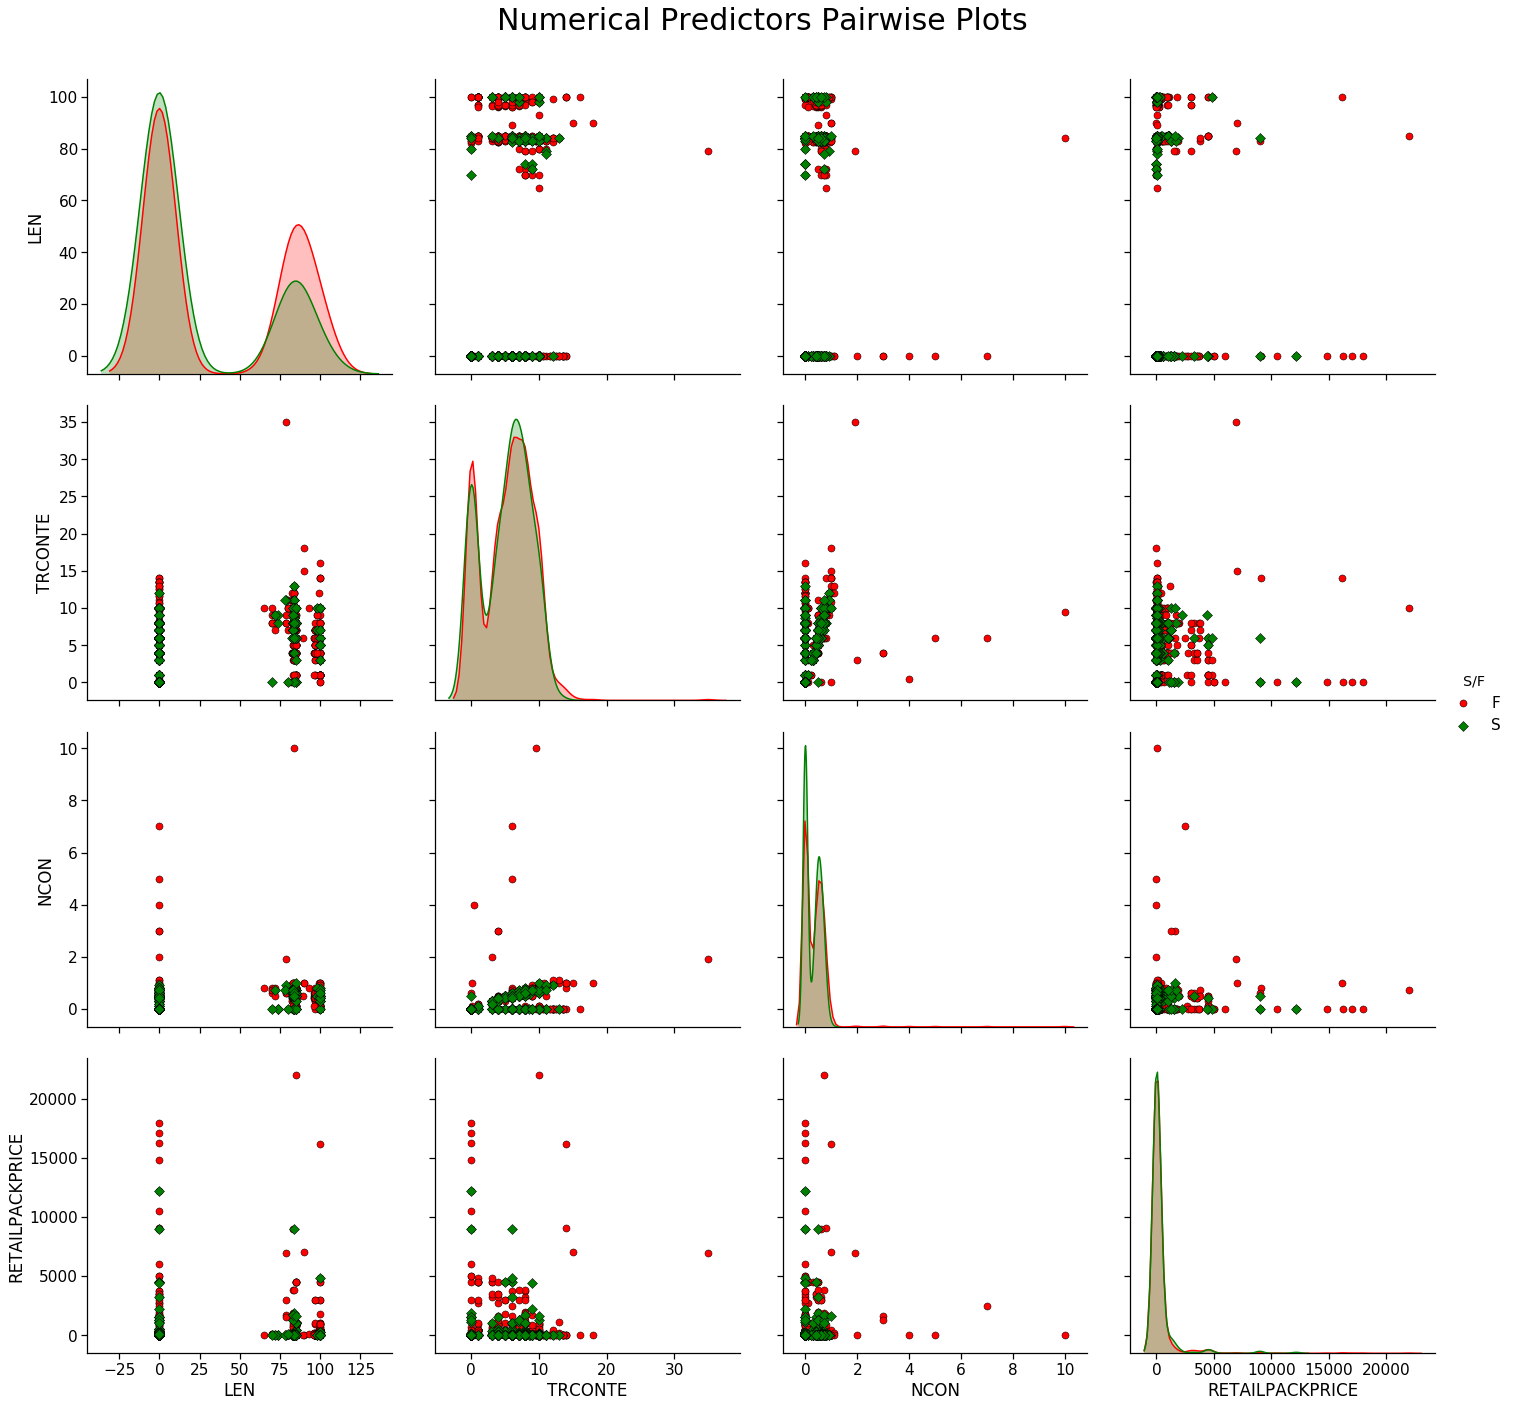

In [36]:
with sns.plotting_context("notebook", font_scale=1.4):
    title = 'Numerical Predictors Pairwise Plots'
    pp = sns.pairplot(df_num,
                      hue='S/F',
                      vars=['LEN', 'TRCONTE', 'NCON', 'RETAILPACKPRICE'],
                      markers=['o', 'D'],  
                      palette={"S": "green", "F": "red"}, 
                      height=5,
                      plot_kws=dict(edgecolor="black", linewidth=0.5, s=50)
                     )
    
    fig = pp.fig 
    fig.subplots_adjust(top=0.93)
    t = fig.suptitle(title, fontsize=30)
    pp.savefig(os.path.join('images', title))


We can see some small relationships:

* Succesfull launches RETAILPACKPRICE distribution is turned to left a bit compared to not Succesfull launches.
* When LEN=0, Succesfull launches are more than not Succesfull ones.
* When NCON is high, not Succesfull launches are more than Succesfull ones.


#### 3D numerical plots

In [38]:
def plot_3D_numeric(f_1, f_2, f_3):
    title = '{} - {} - {}'.format(f_1, f_2, f_3)
    fig = plt.figure(figsize=(10, 8))
    fig.suptitle(title, fontsize=15, fontweight='bold')
    ax = fig.gca(projection='3d')

    xs = list(df_num[f_1])
    ys = list(df_num[f_2])
    zs = list(df_num[f_3])
    
    data_points = [(x, y, z) for x, y, z in zip(xs, ys, zs)]
    colors = ['green' if ms > threshold else 'red' for ms in list(df_num['Market_Share'])]
    for data, color in zip(data_points, colors):
        x, y, z = data
        if color == 'green':
            m = 'D'
        else:
            m = 'o'
        ax.scatter(x, y, z, alpha=0.8, c=color, s=50, marker=m)
        
    ax.w_xaxis.set_pane_color((0.83, 0.83, 0.83, 1.0))
    ax.w_yaxis.set_pane_color((0.83, 0.83, 0.83, 1.0))
    ax.w_zaxis.set_pane_color((0.83, 0.83, 0.83, 1.0))
    
    ax.set_xlabel(f_1, fontsize=13)
    ax.xaxis.labelpad = 12
    
    ax.set_ylabel(f_2, fontsize=13)
    ax.yaxis.labelpad = 10
    
    ax.set_zlabel(f_3, fontsize=13, rotation=90)
    ax.zaxis.labelpad = 3
    
    plt.tight_layout()
    fig.subplots_adjust(top=0.93)
    plt.savefig(os.path.join('images', title))
    plt.show()

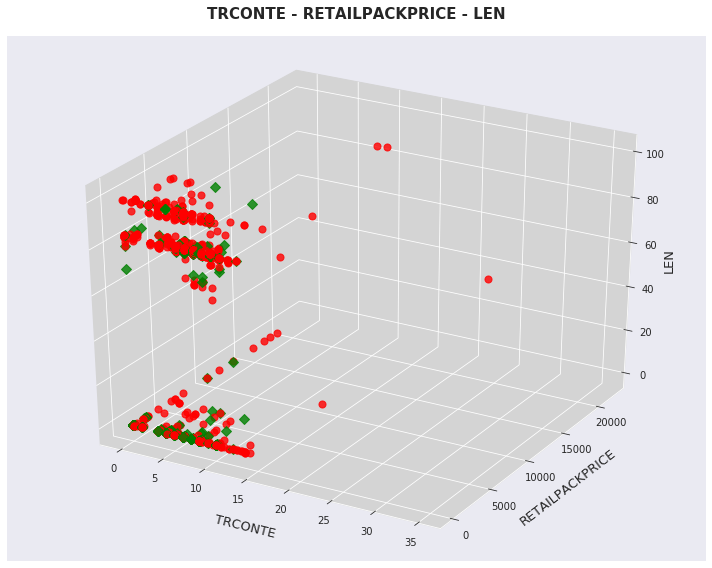

In [39]:
with sns.axes_style("dark"):
    plot_3D_numeric('TRCONTE', 'RETAILPACKPRICE', 'LEN')

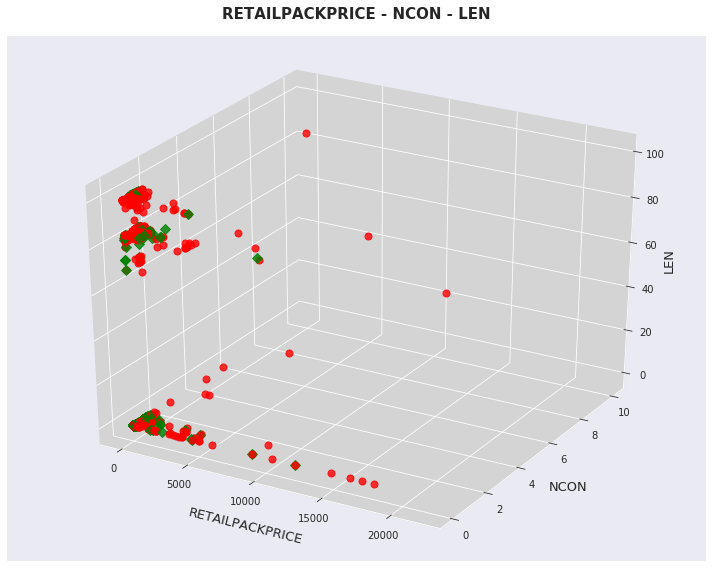

In [40]:
with sns.axes_style("dark"):
    plot_3D_numeric('RETAILPACKPRICE', 'NCON', 'LEN')

In [41]:
del df_num

### Exploring Categorical data

In [ ]:
# selcting categorical features
df_cat = df[df['data_type'] == 'train']
df_cat = df_cat.select_dtypes(exclude=['float64'])

# adding response variable, removing negative values
df_cat['Market_Share'] = df_train['Market_Share']
df_cat = df_cat[df_cat['Market_Share'] >= 0]

df_cat['S/F'] = df_cat['Market_Share'] > threshold
df_cat.loc[df_cat['S/F'] == True, 'S/F'] = 'S'
df_cat.loc[df_cat['S/F'] == False, 'S/F'] = 'F'

df_cat.drop(columns='data_type', inplace=True)

In [ ]:
# removing predictor name from categories for better visualisation
for col in df_cat.columns[:-2]:
    df_cat[col] = df_cat[col].apply(lambda x: str(x).replace(col, ''))

In [ ]:
df_cat.head()

#### Market_Share Distribution within Categorical features with boxplots

In [ ]:
# helper function for plotting boxplots
def plot_boxplot(column):
    plt.figure(figsize = (25, 10))
    ax = sns.boxplot(x=column, y='Market_Share', data=df_cat)
    plt.axhline(y=threshold, label='threshold', linewidth=3)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.title('{} - MarketShare'.format(column), fontsize=20)
    plt.legend(fontsize=15)
    if len(df_cat[column].unique()) > 50:
        ax.set(xticklabels=[])
    else:
        plt.xticks(rotation=90, fontsize=20)
    ax.set_ylabel('MarketShare', size=18)
    ax.set_xlabel(column, size=18)
    plt.tight_layout()

In [ ]:
for column in df_cat.columns[:-2]:
    plot_boxplot(column)

#### Market_Share Distribution within Categorical features with violinplots

In [ ]:
# helper function for plotting violinplots
def plot_violin(column):
    plt.figure(figsize = (25, 10))
    ax = sns.violinplot(x=column, y='Market_Share', data=df_cat, scale='width')
    plt.axhline(y=threshold, label='threshold', linewidth=3)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.title('{} - MarketShare'.format(column), fontsize=20)
    plt.legend(fontsize=15)
    if len(df_cat[column].unique()) > 50:
        ax.set(xticklabels=[])
    else:
        plt.xticks(rotation=90, fontsize=20)
    ax.set_ylabel('MarketShare', size=18)
    ax.set_xlabel(column, size=18)
    plt.tight_layout()

In [ ]:
for column in df_cat.columns[:-2]:
    plot_violin(column)

We can see visible dependency of **Market Share** distribution from the following features:

* **MARKET**
* **BLDIMAGE**
* **'BRAND' related all features"**
* **ITEMSCODE**
* **PRICECLASS**
* **PCT**
* **SPECIALFLAVOR**


For the other features we can see that within their categories **Market Share** distribution more or less is  not varying a lot.

#### Market_Share Distribution within 2 Categorical features

In [ ]:
g = sns.FacetGrid(df_cat, col="REGION", col_wrap=4, hue='S/F',  palette={"S": "green", "F": "red"})
g.map(plt.scatter, "ITEMSCODE", "Market_Share", alpha=.7)
g.set(xticks=[]);

In [ ]:
g = sns.FacetGrid(df_cat, col="REGION", 
                  despine=False, hue='S/F', 
                  margin_titles=True, 
                  palette={"S": "green", "F": "red"})
g.map(plt.scatter, "LOCALCLASS", "Market_Share", alpha=.7)
g.set(xticks=[])
plt.tight_layout()

In [ ]:
g = sns.FacetGrid(df_cat, col="PRICECLASSON", 
                  despine=True, hue='S/F', 
                  margin_titles=True, 
                  palette={"S": "green", "F": "red"})
g.map(plt.scatter, "REGION", "Market_Share", alpha=.7)
g.set_titles(size=14)
g.set_ylabels(size=14)
g.set_xlabels(size=14)
plt.tight_layout()

In [ ]:
g = sns.FacetGrid(df_cat, col="REGION", aspect=1.5,
                  despine=True, hue='S/F', 
                  margin_titles=False, 
                  palette={"S": "green", "F": "red"})
g.map(plt.scatter, "PCKT", "Market_Share", alpha=.7)
g.set(xticks=[])
g.set_titles(size=20)
g.set_ylabels(size=16)
g.set_xlabels(size=16)
plt.tight_layout()

In [ ]:
g = sns.FacetGrid(df_cat, col="REGION", aspect=1.8, height=3.5,
                  despine=True, hue='S/F', 
                  margin_titles=False, 
                  palette={"S": "green", "F": "red"})
g.map(plt.scatter, "BRANDFAMILY", "Market_Share", alpha=.7)
g.set_titles(size=20)
g.set_ylabels(size=18)
g.set_xlabels(size=18)
plt.tight_layout()

We can see that from REGION to REGION different predictors affect differently on our response variable.

#### Success probability within Categorical features

In [ ]:
# adding Success or Failure
df_cat['S/F'] = df_cat['Market_Share'] > threshold

In [ ]:
# helper function for plotting porbabilities
def plot_success_probability(column):
    temp =  df_cat.groupby(column)['S/F'].aggregate({'S': sum, 'ALL': 'count'}).reset_index()
    temp['probability'] = temp['S'] / temp['ALL']
    variance = temp['probability'].var()
    plt.figure(figsize = (25, 10))
    ax = sns.scatterplot(x=temp[column], y=temp['probability'], s=1000)
    plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
    plt.title('{} - SUCCESS PROBABILITY, variance = {:.3f}'.format(column, variance), fontsize=20)
    if len(temp[column].unique()) > 50:
        ax.set(xticklabels=[])
    else:
        plt.xticks(rotation=90)
    ax.set_ylabel('SUCCESS PROBABILITY', size=18)
    plt.yticks(size=25)
    ax.set_xlabel(column, size=18)
    plt.tight_layout()

In [ ]:
for column in df_cat.columns[:-2]:
    plot_success_probability(column)

Based on these graphs we can assume that our final result is very sensitive to the threshold - 0.7%. 

In [ ]:
del df_cat

### Exploring Categorical & Numerical data together

In [ ]:
# selcting categorical features
df_mix = df[df['data_type'] == 'train']
df_mix['Market_Share'] = df_train['Market_Share']

# adding response variable, removing negative values
df_mix = df_mix[df_mix['Market_Share'] >= 0]
df_mix['S/F'] = df_mix['Market_Share'] > threshold
df_mix.loc[df_mix['S/F'] == True, 'S/F'] = 'S'
df_mix.loc[df_mix['S/F'] == False, 'S/F'] = 'F'

df_mix.drop(columns='data_type', inplace=True)

# removing predictor name from categories for better visualisation
for col in df_mix.columns[:-2]:
    df_mix[col] = df_mix[col].apply(lambda x: str(x).replace(col, ''))

#### 2D grouping and aggregation

In [ ]:
def plot_group_aggergate(f_1, f_2, figsize, fontsize):
    temp = df_mix.groupby(by=[f_1, f_2])['Market_Share'].aggregate({'mean': np.mean})
    temp = pd.DataFrame(temp.unstack())
    temp = pd.DataFrame(temp.values * 100, columns=temp.columns.droplevel(), index=temp.index)
    
    title = 'Mean MarketShare (%) distributed by {} and {}'.format(f_1, f_2)
    fig3, ax = plt.subplots(figsize=figsize)
    plt.suptitle(title, fontsize=fontsize)
    sns.heatmap(temp, annot=True, fmt='.2f', linewidths=.1, ax=ax, cmap='Oranges', cbar=False, vmax=0.7,
                annot_kws={'fontsize': 8, 'fontweight': 'bold'},
                linecolor='black')
    fig3.subplots_adjust(top=0.9)
    ax.set_xlabel(f_2, fontsize=15)
    ax.set_ylabel(f_1, fontsize=15);
    plt.savefig(title)

    

In [ ]:
plot_group_aggergate('REGION', 'BRANDFAMILY', (30, 6), 20)

In [ ]:
plot_group_aggergate('LENCATEGORY', 'ITEMSCODE', (10, 6), 12)

In [ ]:
plot_group_aggergate('LOCALCLASS', 'PCKT',(12, 6), 12)

#### 4D

In [ ]:
g = sns.FacetGrid(df_mix, col="LENCATEGORY", row='TCLASS',  hue='S/F', 
                  aspect=1.2, palette={"S": "green", "F": "red"})

g.map(plt.scatter,  "RETAILPACKPRICE", "Market_Share", alpha=0.8, 
      edgecolor='white', linewidth=0.5, )
fig = g.fig 
fig.subplots_adjust(top=0.9, wspace=0.3)
fig.suptitle('TCLASS - LENCATEGORY - RETAILPACKPRICE - MarketShare', fontsize=20)
plt.xticks([]);


### Data Transformation

Now we will check distributions of numerical features and will make some transformations in order to make them more normally distributted, if it is needed.

In [43]:
df_num = df[df['data_type'] == 'train'] 
df_num['Market_Share'] = df_train['Market_Share']
df_num = df_num.select_dtypes(include=['float64'])

# removing negative values
df_num = df_num[df_num['Market_Share'] >= 0]

#### Response variable: Market_Share distribution

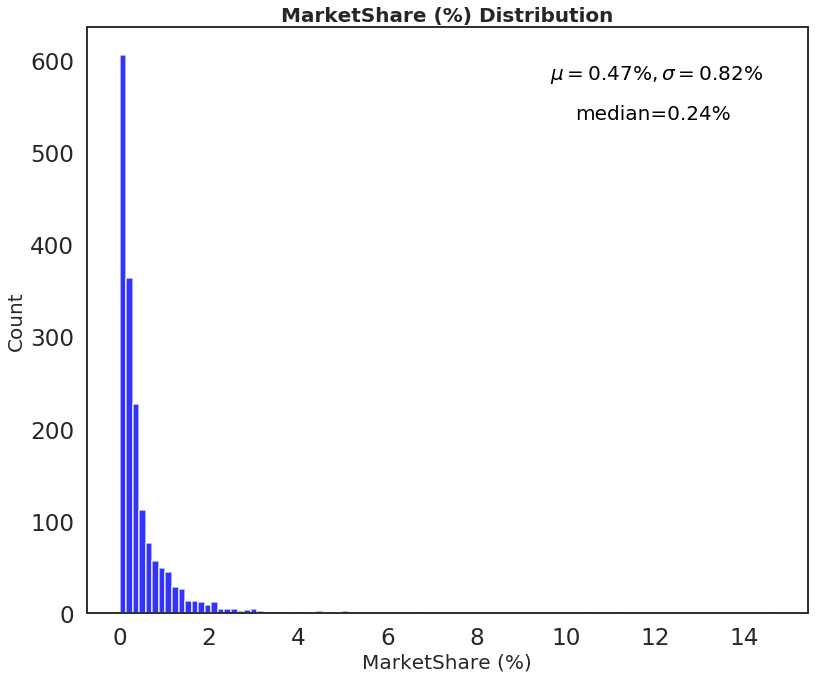

In [77]:
temp = df_num['Market_Share'].copy()
temp = temp * 100
with sns.plotting_context("talk", font_scale=1.4):
    with sns.axes_style('white'):
        plt.figure(figsize=(12, 10))
        sns.distplot(temp, color='blue', bins=100, hist_kws={'alpha': 0.8}, norm_hist=False, kde=False)
        plt.xlabel("MarketShare (%)", fontsize=20, )
        plt.ylabel('Count', fontsize=20)
        plt.title('MarketShare (%) Distribution', fontsize=20, fontweight='bold')
        plt.text(550, 600, '$\mu={:.2f}\%, \sigma={:.2f}\%$'.format(temp.mean(), temp.std()), 
                 fontsize=20, transform=ax.transScale, color='black')
        plt.text(575, 560, 'median={:.2f}%'.format(temp.median()), 
                 fontsize=20, transform=ax.transScale, color='black')
#         plt.text(0.7, 0.8, 'success rate={:.2f}%'.format(temp[temp > 0.7].count() / len(temp) * 100), 
#                  fontsize=20, transform=ax.transAxes, color='black')
        plt.tight_layout()
        plt.savefig(os.path.join('images', 'MarketShare distribution'))
        plt.show()

skew     7.484949055627678
count    1692.000000
mean        0.004719
std         0.008156
min         0.000000
25%         0.000902
50%         0.002354
75%         0.005239
max         0.146897
Name: Market_Share, dtype: float64


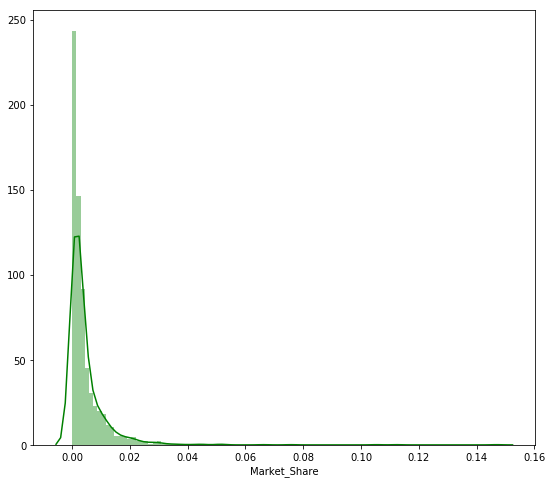

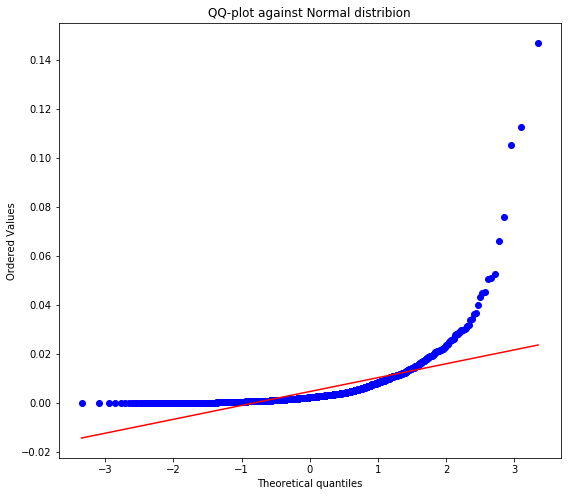

In [78]:
print('skew    ', df_num['Market_Share'].skew())
print(df_num['Market_Share'].describe())

# Market Share distribution
plt.figure(figsize=(9, 8))
sns.distplot(df_num['Market_Share'], color='g', bins=100, hist_kws={'alpha': 0.4}) 

# Get also the QQ-plot
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(df_num['Market_Share'], plot=plt, dist='norm',)
plt.title('QQ-plot against Normal distribion')
plt.show()

**Some insights:**

*  There are some values, which are **negative**. This can not be in reality, because our data is describing product Market Share, which can not be negative. Minimum possible value is 0. So we should remove these items from data.


*  Data has the shape of **Exponential** distribution. As (linear) models love **normally** distributed data , we need to transform this variable and make it more normally distributed.

    

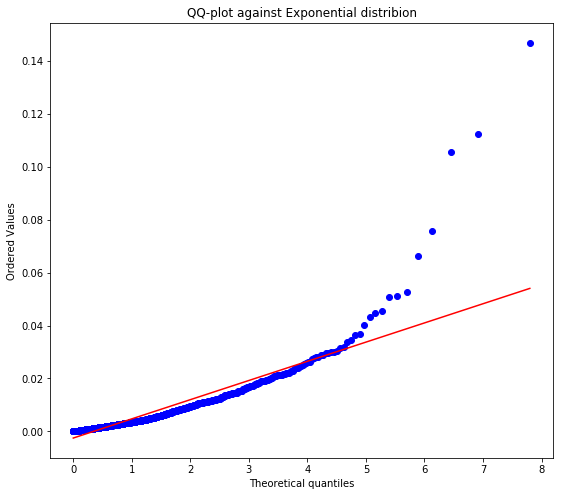

In [79]:
fig = plt.figure(figsize=(9, 8))
res = stats.probplot(df_num['Market_Share'], plot=plt, dist='expon')
plt.title('QQ-plot against Exponential distribion')
plt.show()

*  We can see that there are some **outliers** also (> 0.06). We will handle them, when creating models.

**BoxCox-transformation of the response variable for making it more normally distributed:**

skew     0.35200281817161694

 mu = -3.10 and sigma = 0.31



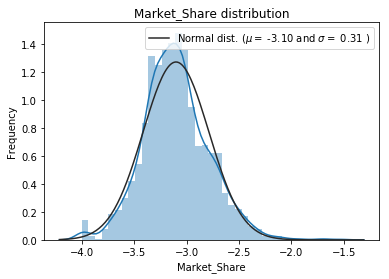

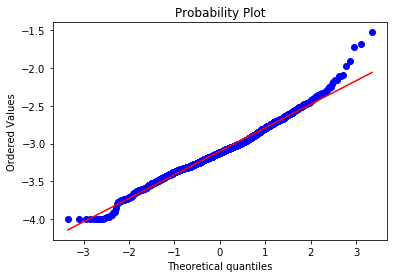

In [80]:
# we will use BoxCox from scipy with lambda = 0.25
# we add very small number to Market_Share for cut it zrom 0 
lmbda = 0.25
df_num['Market_Share'] = stats.boxcox(df_num['Market_Share'] + 1e-50, lmbda=lmbda)  
print('skew    ', df_num['Market_Share'].skew())

# check the new distribution 
sns.distplot(df_num['Market_Share'] , fit=stats.norm);

# get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(df_num['Market_Share'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Market_Share distribution')

# get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df_num['Market_Share'], plot=plt)
plt.show()

*  Now data is more normally distributed.

#### Numeric features distribution

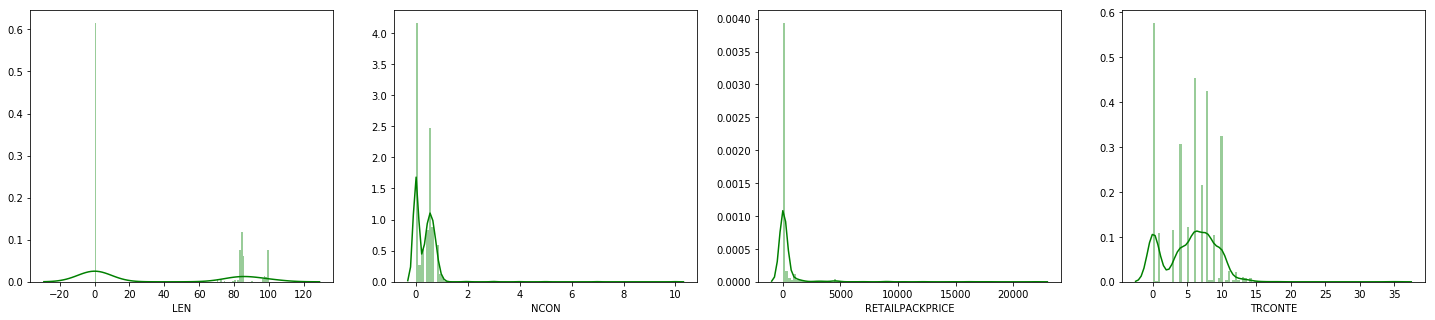

LEN                0.510686
NCON               8.750785
RETAILPACKPRICE    8.527337
TRCONTE            0.162301
Market_Share       0.352003
dtype: float64


In [81]:
fig, ax = plt.subplots(1, 4, **{'figsize': (25, 5)})
for i in range(4):
    c = df_num.columns[i]
    sns.distplot(df_num[c], ax=ax[i], color='g', bins=100, hist_kws={'alpha': 0.4}) 
plt.show()

print(df_num.skew())

We can see that **NCON** and **RETAILPACKPRICE** have quite big skew. **LEN** is also skewed. So we will transform these features with BoxCox in order to have less skew.

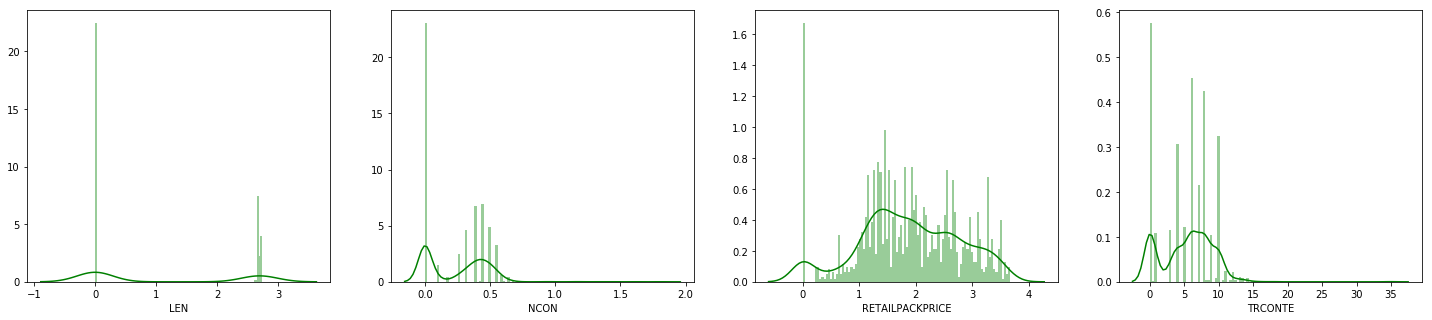

LEN                0.474663
NCON               0.564668
RETAILPACKPRICE   -0.151020
TRCONTE            0.162301
Market_Share       0.352003
dtype: float64


In [82]:
# we will use boxcox1p - ((1+x)**lmbda - 1) / lmbda with lmbda = -0.25 (we need because some values are 0)
df_num[['RETAILPACKPRICE', 'NCON', 'LEN']] = boxcox1p(df_num[['RETAILPACKPRICE', 'NCON', 'LEN']], -0.25)

fig, ax = plt.subplots(1, 4, **{'figsize': (25, 5)})
for i in range(4):
    c = df_num.columns[i]
    sns.distplot(df_num[c], ax=ax[i], color='g', bins=100, hist_kws={'alpha': 0.4}) 
plt.show()

print(df_num.skew())

Now we can see that more or less or variables have small skew (< 0.5).

### Summary

*  We have 31 features, 4 numerical and 27 categorical.

*  Our response variable - **Market Share** is transformed with **BoxCox (lambda=0.25)** and now its shape is like normal distribution shape.
* Numeric features **'RETAILPACKPRICE', 'NCON', 'LEN'** are transformed with **BoxCox1p (lambda=-0.25)**, in order to have less skew.
* There is no strong linear correlation between response variable and numerical features.
* **SPECIALFLAVOR** missed values are filled with *NOSPECIALFLAVOR* (as a new category)
* **TIPCOLOR**  missed values are filled with *NOTIPCOLOR* (as a new category)
* For different reasons we will not use the following features: **'BRMID', 'LATESTPERIODINDEX', 'NPLLAUNCHDATE', 'ISREPLACEMENT', 'BRM', 'MARKETEDBRAND','BRANDSUBFAMILY', 'NPLLAUNCHYEAR', 'RTYPE', 'ITEMSHAPE'**.